In [47]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [49]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


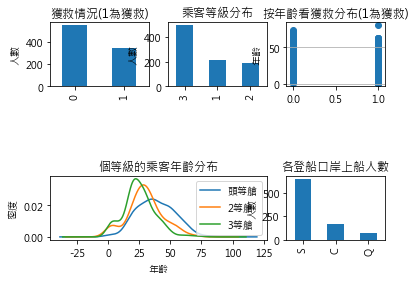

In [50]:
import matplotlib.pyplot as plt

fig=plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((3,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title("獲救情況(1為獲救)")
plt.ylabel("人數")

plt.subplot2grid((3,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("人數")
plt.title("乘客等級分布")

plt.subplot2grid((3,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年齡")
plt.grid(b=True,which='major',axis='y')
plt.title("按年齡看獲救分布(1為獲救)")

plt.subplot2grid((3,3),(2,0),colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.xlabel("年齡")
plt.ylabel("密度")
plt.title("個等級的乘客年齡分布")
plt.legend(('頭等艙','2等艙','3等艙'),loc='best')

plt.subplot2grid((3,3),(2,2))
data_train.Embarked.value_counts().plot(kind="bar")
plt.title("各登船口岸上船人數")
plt.ylabel("人數")

plt.show()

<Figure size 432x288 with 0 Axes>

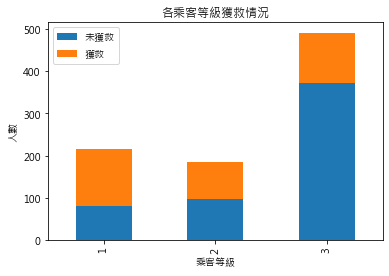

In [51]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_0=data_train.Pclass[data_train.Survived==0].value_counts()
Survived_1=data_train.Pclass[data_train.Survived==1].value_counts()
df=pd.DataFrame({'未獲救':Survived_0,'獲救':Survived_1})
df.plot(kind='bar',stacked=True)
plt.title('各乘客等級獲救情況')
plt.xlabel("乘客等級")
plt.ylabel('人數')
plt.show()

<Figure size 432x288 with 0 Axes>

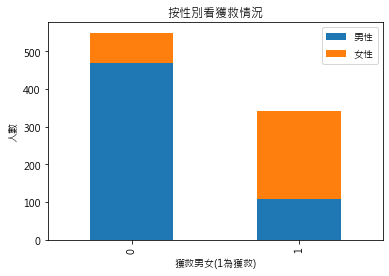

In [52]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_m=data_train.Survived[data_train.Sex=='male'].value_counts()
Survived_f=data_train.Survived[data_train.Sex=='female'].value_counts()
df=pd.DataFrame({'男性':Survived_m,'女性':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title('按性別看獲救情況')
plt.xlabel('獲救男女(1為獲救)')
plt.ylabel('人數')
                               
plt.show()

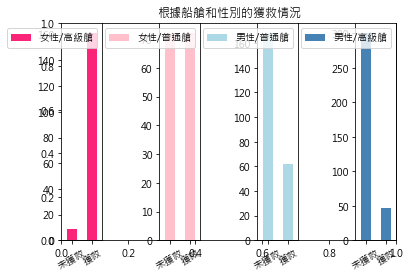

In [53]:
fig=plt.figure()
fig.set(alpha=0.65)
plt.title('根據船艙和性別的獲救情況')

ax1=fig.add_subplot(171)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass!=3].value_counts().sort_index().plot(kind='bar',label="female highclass",color='#FA2479')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['未獲救','獲救'],rotation=30)
ax1.legend(['女性/高級艙'],loc='best')
           
ax2=fig.add_subplot(173)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass==3].value_counts().sort_index().plot(kind='bar',label="female, low class",color='pink')
ax2.set_xticklabels(['未獲救','獲救'],rotation=30)
ax2.legend(['女性/普通艙'],loc='best')
           
ax3=fig.add_subplot(175)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=3].value_counts().sort_index().plot(kind='bar',label="male, high class",color='lightblue')
ax3.set_xticklabels(['未獲救','獲救'],rotation=30)
ax3.legend(['男性/普通艙'],loc='best')
           
ax4=fig.add_subplot(177)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==3].value_counts().sort_index().plot(kind='bar',label="male low class",color='steelblue')
ax4.set_xticklabels(['未獲救','獲救'],rotation=30)
ax4.legend(['男性/高級艙'],loc='best')          
           
plt.show()

<Figure size 432x288 with 0 Axes>

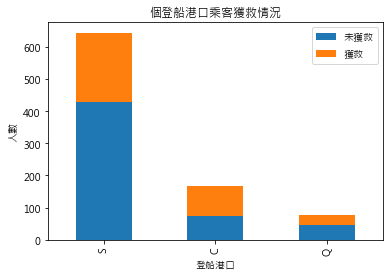

In [54]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_0=data_train.Embarked[data_train.Survived==0].value_counts()
Survived_1=data_train.Embarked[data_train.Survived==1].value_counts()
df=pd.DataFrame({'未獲救':Survived_0,'獲救':Survived_1})
df.plot(kind='bar',stacked=True)
plt.title('個登船港口乘客獲救情況')
plt.xlabel('登船港口')
plt.ylabel('人數')

plt.show()

In [55]:
gg=data_train.groupby(['SibSp','Survived'])
df=pd.DataFrame(gg['PassengerId'].count())
print(df)

gp=data_train.groupby(['Parch','Survived'])
df=pd.DataFrame(gp['PassengerId'].count())
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [56]:
data_train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
E101           3
C22 C26        3
D              3
F33            3
C123           2
C78            2
C68            2
B77            2
C83            2
D20            2
E24            2
D36            2
B51 B53 B55    2
D26            2
B20            2
B22            2
F G73          2
E67            2
E8             2
C124           2
B58 B60        2
D17            2
E25            2
C92            2
C126           2
C2             2
              ..
A36            1
B94            1
E50            1
C49            1
C87            1
D10 D12        1
E49            1
B3             1
C47            1
B82 B84        1
A19            1
D28            1
F E69          1
C103           1
C104           1
B73            1
C30            1
A24            1
B69            1
C95            1
C90            1
D9             1
C45            1
B4             1
E10            1
F G63          1
E38            1
E31           

<Figure size 432x288 with 0 Axes>

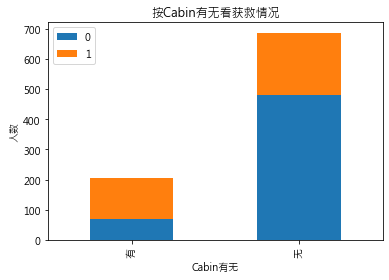

In [57]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_cabin = data_train.Survived[data_train.Cabin.notnull()].value_counts()
Survived_nocabin = data_train.Survived[data_train.Cabin.isnull()].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

In [58]:
#開始特徵處理

from sklearn.ensemble import RandomForestRegressor
### 使用 RandomForestClassifier 填补缺失的年龄属性

def set_missing_ages(df):
    age_df=df[['Age','Fare','Parch','SibSp','Pclass']]
    known_age=age_df[age_df.Age.notnull()].values
    unknown_age=age_df[age_df.Age.isnull()].values
    
    y=known_age[:,0]
    x=known_age[:,1:]
    
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)
    predictAges=rfr.predict(unknown_age[:,1:])
    
    df.loc[(df.Age.isnull()),'Age']=predictAges
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df
    
data_train, rfr=set_missing_ages(data_train)
data_train=set_Cabin_type(data_train)

data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [59]:
dummies_Cabin=pd.get_dummies(data_train.Cabin,prefix='Cabin')
dummies_Embarked=pd.get_dummies(data_train.Embarked,prefix='Embarked')
dummies_Sex=pd.get_dummies(data_train.Sex,prefix='Sex')
dummies_Pclass=pd.get_dummies(data_train.Pclass,prefix='Pclass')

df=pd.concat([data_train,dummies_Cabin,dummies_Pclass,dummies_Embarked,dummies_Sex],axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,0,1,1,0,0,0,0,1,1,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1


In [60]:
import sklearn.preprocessing as preprocessing
scaler=preprocessing.StandardScaler()

age_scale_param=scaler.fit(df.Age.values.reshape(-1,1))
df['Age_scaled']=scaler.fit_transform(df.Age.values.reshape(-1,1),age_scale_param)

Fare_scale_param=scaler.fit(df.Fare.values.reshape(-1,1))
df['Fare_scaled']=scaler.fit_transform(df.Fare.values.reshape(-1,1),Fare_scale_param)

df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1,-0.561380,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0,0.613171,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,-0.267742,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,1,0,0,0,0,1,1,0,0.392942,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1,0.392942,-0.486337


In [61]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即第0列：Survival结果
y = train_np[:, 0]

# X即第1列及以后：特征属性值
X = train_np[:, 1:]

# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [62]:
data_test=pd.read_csv('test.csv')
data_test.loc[(data_test.Fare.isnull()),'Fare']=0

tmp_df=data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age=tmp_df[data_test.Age.isnull()].values
X=null_age[:,1:]
predictedAges=rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),'Age']=predictedAges
data_test=set_Cabin_type(data_test)

dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), Fare_scale_param)
df_test.head(20)

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [63]:
test=df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions=clf.predict(test)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].values,'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)
pd.read_csv("logistic_regression_predictions.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [64]:
#強化版
pd.DataFrame({'coiumns':list(train_df.columns)[1:],'coef':list(clf.coef_.T)})

,coiumns,coef
0,SibSp,[-0.34423579780315217]
1,Parch,[-0.10491591830099987]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.9021092029245382]
4,Pclass_1,[0.3411587779895369]
5,Pclass_2,[0.0]
6,Pclass_3,[-1.1941300531375212]
7,Embarked_C,[0.0]
8,Embarked_Q,[0.0]
9,Embarked_S,[-0.4172627407846627]


In [65]:
from sklearn.model_selection import cross_val_score,train_test_split
clf=linear_model.LogisticRegression(solver='liblinear',C=1.0,penalty='l1',tol=1e-6)
train_test=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
all_data = train_test.values
x=all_data[:,1:]
y=all_data[:,0]
print(cross_val_score(clf,x,y,cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [66]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
# split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


In [67]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
x = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

bagging_clf=BaggingRegressor(clf,n_estimators=20,max_samples=0.8,max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=-1)
bagging_clf.fit(x,y)
test=df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions=bagging_clf.predict(test)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv('logistic_regression_bagging_predictions.csv',index=False)
pd.read_csv('logistic_regression_bagging_predictions.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0
